# Section 2) Explain your data set, how it is composed, and how you collected it (30%)

## Data description：
### In this model, we will select 7 features and the label from the original questionnaire data to build the model, the following are 8 selected columns
#### Q1: Age
#### Q2: What category do you fall under? (undergraduate or Graduate)
#### Q3: Are you employed?
#### Q4: What is your average monthly income, including money from outside sources such as stipend scholarships, or allowance from your parents?
#### Q5: What is your average monthly spending (not including rent/utilities)?
#### Q6: What do you spend the most money on?
#### Q7: What do you usually spend your credit card cash back on? 
#### Q8: "You are given the option to choose Credit Card A or Credit Card B each with the following cash back options:
#### Credit card A:-Redeem as cash-Apply to statement-Redeem as gift card ($20 minimum)
#### Credit Card B:-Redeem as cash-Apply to statement-Invest in a stock (no minimum)
#### Which credit card option would you be likely to choose?"
### We would like to feed our model with question 1-7 to predict question 8. With the prediction, we can further the strategy on how to conduct customized promotion to specific groups of people.




# Data explanation
We plan to use students'age, education level, employment, monthly income and their spending behavior as our input and predict option as output

## The data is collected from Qualtrics survey system. It is a simple to use web-based survey tool to conduct survey research, evaluations and other data collection activities. 
## We created our survey using Qualtrics survey system and distributed the link through school email. 

## In our survey, some students include a range for monthly income, we fill in the medium instead in data cleaning

# Section 3) Load of the data set (10%)

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
# preprocess the data
# Extracting Missing Count and Unique Count by Column

data = pd.read_csv('Shi_and_Song_week10_data.csv')

# Section 4) Display data (50%)

In [2]:
data.head(5)
# row 2 of data is the question description

,StartDate,EndDate,Status,Duration (in seconds),Finished,RecordedDate,DistributionChannel,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,Start Date,End Date,Response Type,Duration (in seconds),Finished,Recorded Date,Distribution Channel,"By continuing this survey, you consent to part...",Age,What category do you fall under?,Are you employed?,"What is your average monthly income, including...",What is your average monthly spending (not inc...,What do you spend the most money on?,What do you usually spend your credit card cas...,You are given the option to choose Credit Card...
1,11/11/2019 8:18,11/11/2019 8:23,IP Address,333,TRUE,11/11/2019 8:23,anonymous,"Yes, I agree",23,Graduate (Masters),Yes,"$1,300",$450,Other,Apply to statement balance,Option A
2,11/11/2019 8:31,11/11/2019 8:34,IP Address,171,TRUE,11/11/2019 8:34,anonymous,"Yes, I agree",22,Graduate (Masters),Yes,"$1,000",$500,Groceries/day-to-day needs,Apply to statement balance,Option A
3,11/4/2019 9:08,11/4/2019 10:30,IP Address,4934,FALSE,11/11/2019 10:31,anonymous,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
4,11/11/2019 16:07,11/11/2019 16:09,IP Address,109,TRUE,11/11/2019 16:09,anonymous,"Yes, I agree",22,Graduate (Masters),Yes,1200,400,Groceries/day-to-day needs,Redeem as cash,Option B


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   StartDate              47 non-null     object
 1   EndDate                47 non-null     object
 2   Status                 47 non-null     object
 3   Duration (in seconds)  47 non-null     object
 4   Finished               47 non-null     object
 5   RecordedDate           47 non-null     object
 6   DistributionChannel    47 non-null     object
 7   Q0                     46 non-null     object
 8   Q1                     43 non-null     object
 9   Q2                     43 non-null     object
 10  Q3                     44 non-null     object
 11  Q4                     42 non-null     object
 12  Q5                     42 non-null     object
 13  Q6                     43 non-null     object
 14  Q7                     39 non-null     object
 15  Q8                     41

In [4]:
# drop unnecessary data
data.drop([0,1],inplace=True)
data.drop(columns=['EndDate','Duration (in seconds)','Status','RecordedDate','DistributionChannel','Q0'],axis=1,inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 2 to 46
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   StartDate  45 non-null     object
 1   Finished   45 non-null     object
 2   Q1         41 non-null     object
 3   Q2         41 non-null     object
 4   Q3         42 non-null     object
 5   Q4         40 non-null     object
 6   Q5         40 non-null     object
 7   Q6         41 non-null     object
 8   Q7         37 non-null     object
 9   Q8         39 non-null     object
dtypes: object(10)
memory usage: 3.9+ KB
None


In [5]:
# fill in data that has range
data.iloc[7,data.columns.get_loc("Q5")]=175
data.iloc[33,data.columns.get_loc("Q5")]=1750
data=data[data['Finished']=='TRUE']

In [6]:
# check out unique and missing data
unique_count = []
for x in data.columns:
    unique_count.append([x,len(data[x].unique()),data[x].isnull().sum()])
con=pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T
print(con)

Column   StartDate  Finished  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8
Unique          39         1   9   3   2  26  24   6   4   2
Missing          0         0   0   0   0   1   1   0   2   0


In [7]:
# clear data and manage data type
data['Average_income'] = data['Q4'].apply(lambda x: re.sub("[\s+\.\!\/_,$%^*(+\"\')+\]]+|[+——([)?【】“”！，\-。？、"
                                                            "~@#￥%……&*（）]+", '', str(x)))
data['Average_spend'] = data['Q5'].apply(lambda x: re.sub("[\s+\.\!\/_,$%^*(+\"\')+\]]+|[+——([)?【】“”！，\-。"
                                                           "？、~@#￥%……&*（）]+", '', str(x)))
data['Q1'] = data['Q1'].astype(int)
data['Average_income'] = pd.to_numeric(data['Average_income'], errors='coerce')
data['Average_spend'] = pd.to_numeric(data['Average_spend'], errors='coerce')
data.loc[data['Average_spend'] ==0,'Average_spend']=np.nan
data.loc[data['Average_income'] ==0,'Average_income']=np.nan
miss_income_col = data.loc[data['Average_income'].isnull()]['Average_spend'].unique()
print(miss_income_col)

[650. 300.]


In [8]:
# fill missing value in income
def fill_na_with_mean1(ds, value):
  fill_value = ds.loc[ds['Average_spend'] ==value]['Average_income'].mean()
  condit = ((ds['Average_spend'] == value) & (ds['Average_income'].isnull()))
  ds.loc[condit, 'Average_income'] = ds.loc[condit, 'Average_income'].fillna(fill_value)
for a in miss_income_col:
  fill_na_with_mean1(data, a)

miss_spend_col = data.loc[data['Average_spend'].isnull()]['Average_income'].unique()
print(miss_spend_col)

[1000.]


In [9]:
# fill missing value in spend
def fill_na_with_mean2(ds, value):
  fill_value = ds.loc[ds['Average_income'] ==value]['Average_spend'].mean()
  condit = ((ds['Average_income'] == value) & (ds['Average_spend'].isnull()))
  ds.loc[condit, 'Average_spend'] = ds.loc[condit, 'Average_spend'].fillna(fill_value)
for a in miss_spend_col:
  fill_na_with_mean2(data, a)

In [10]:
# check null value in spend and income
data.sort_values(by="Average_spend", ascending=True)
data['Average_income']= data['Average_income'].interpolate()
data['Average_spend'].isna().sum()

0

In [11]:
data

,StartDate,Finished,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Average_income,Average_spend
2,11/11/2019 8:31,TRUE,22,Graduate (Masters),Yes,"$1,000",$500,Groceries/day-to-day needs,Apply to statement balance,Option A,1000.0,500.0
4,11/11/2019 16:07,TRUE,22,Graduate (Masters),Yes,1200,400,Groceries/day-to-day needs,Redeem as cash,Option B,1200.0,400.0
5,11/12/2019 20:25,TRUE,24,Graduate (Masters),No,0,650,Groceries/day-to-day needs,Redeem as cash,Option B,950.0,650.0
6,11/13/2019 15:13,TRUE,23,Graduate (Masters),Yes,700,300,Other,NaN,Option B,700.0,300.0
7,11/13/2019 15:16,TRUE,22,Graduate (Masters),Yes,1300,900,"Eating out (restaurants, coffee, etc.)",Apply to statement balance,Option B,1300.0,900.0
8,11/13/2019 15:17,TRUE,22,Graduate (Masters),No,800,150-200,Groceries/day-to-day needs,Apply to statement balance,Option A,800.0,150200.0
9,11/13/2019 15:18,TRUE,22,Graduate (Masters),No,880,175,"Eating out (restaurants, coffee, etc.)",Apply to statement balance,Option B,880.0,175.0
10,11/13/2019 15:22,TRUE,23,Graduate (Masters),No,800,500,Travel,Apply to statement balance,Option B,800.0,500.0
11,11/13/2019 20:46,TRUE,24,Graduate (Masters),Yes,1000,600,Groceries/day-to-day needs,Apply to statement balance,Option B,1000.0,600.0
12,11/13/2019 22:53,TRUE,23,Graduate (Masters),Yes,"$1,000",NaN,"Eating out (restaurants, coffee, etc.)",Redeem as cash,Option A,1000.0,600.0


In [12]:
# Label data and create clean dataset
data = data.rename(columns={'Average_income':'Feature_Average_income', 'Q1':'Feature_Age', 'Q3':'Feature_Employed', 'Q7':'Feature_Cashback_spending', 'Q6':'Feature_Most_expense', 'Q8':'Label_Option',
                           'Q2':'Feature_Education_level'})
data_ml=data[['Feature_Age', 'Feature_Employed', 'Feature_Cashback_spending', 'Feature_Most_expense', 'Label_Option', 'Feature_Average_income', 'Feature_Education_level']]

In [13]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 2 to 46
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Feature_Age                39 non-null     int32  
 1   Feature_Employed           39 non-null     object 
 2   Feature_Cashback_spending  37 non-null     object 
 3   Feature_Most_expense       39 non-null     object 
 4   Label_Option               39 non-null     object 
 5   Feature_Average_income     39 non-null     float64
 6   Feature_Education_level    39 non-null     object 
dtypes: float64(1), int32(1), object(5)
memory usage: 2.3+ KB


In [14]:
data_ml

,Feature_Age,Feature_Employed,Feature_Cashback_spending,Feature_Most_expense,Label_Option,Feature_Average_income,Feature_Education_level
2,22,Yes,Apply to statement balance,Groceries/day-to-day needs,Option A,1000.0,Graduate (Masters)
4,22,Yes,Redeem as cash,Groceries/day-to-day needs,Option B,1200.0,Graduate (Masters)
5,24,No,Redeem as cash,Groceries/day-to-day needs,Option B,950.0,Graduate (Masters)
6,23,Yes,NaN,Other,Option B,700.0,Graduate (Masters)
7,22,Yes,Apply to statement balance,"Eating out (restaurants, coffee, etc.)",Option B,1300.0,Graduate (Masters)
8,22,No,Apply to statement balance,Groceries/day-to-day needs,Option A,800.0,Graduate (Masters)
9,22,No,Apply to statement balance,"Eating out (restaurants, coffee, etc.)",Option B,880.0,Graduate (Masters)
10,23,No,Apply to statement balance,Travel,Option B,800.0,Graduate (Masters)
11,24,Yes,Apply to statement balance,Groceries/day-to-day needs,Option B,1000.0,Graduate (Masters)
12,23,Yes,Redeem as cash,"Eating out (restaurants, coffee, etc.)",Option A,1000.0,Graduate (Masters)


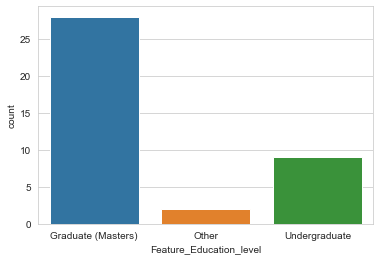

In [15]:
# visualize education 
sns.set_style('whitegrid')
sns.countplot(x='Feature_Education_level',data=data_ml)

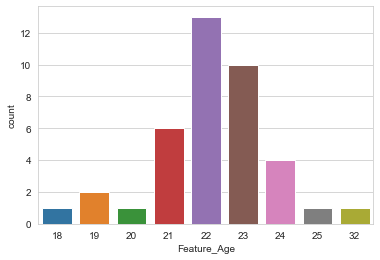

In [16]:
# visualize age
sns.set_style('whitegrid')
sns.countplot(x='Feature_Age',data=data_ml)

In [17]:
from sklearn.preprocessing import label_binarize
data_ml["Label_Option"]= label_binarize(data_ml["Label_Option"], classes=["Option A","Option B"])
data_ml = pd.get_dummies(data_ml)
data_ml

<ipython-input-17-52cea1d49ba9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml["Label_Option"]= label_binarize(data_ml["Label_Option"], classes=["Option A","Option B"])


,Feature_Age,Label_Option,Feature_Average_income,Feature_Employed_No,Feature_Employed_Yes,Feature_Cashback_spending_Apply to statement balance,Feature_Cashback_spending_Redeem as cash,Feature_Cashback_spending_Use to purchase gift cards,"Feature_Most_expense_Eating out (restaurants, coffee, etc.)","Feature_Most_expense_Entertainment (movies, shows, concerts, etc.)",Feature_Most_expense_Groceries/day-to-day needs,Feature_Most_expense_Other,"Feature_Most_expense_Transportation (Uber, buses, train, subway)",Feature_Most_expense_Travel,Feature_Education_level_Graduate (Masters),Feature_Education_level_Other,Feature_Education_level_Undergraduate
2,22,0,1000.0,0,1,1,0,0,0,0,1,0,0,0,1,0,0
4,22,1,1200.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
5,24,1,950.0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
6,23,1,700.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
7,22,1,1300.0,0,1,1,0,0,1,0,0,0,0,0,1,0,0
8,22,0,800.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
9,22,1,880.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
10,23,1,800.0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
11,24,1,1000.0,0,1,1,0,0,0,0,1,0,0,0,1,0,0
12,23,0,1000.0,0,1,0,1,0,1,0,0,0,0,0,1,0,0


In [18]:
# Normalize Average income and age
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_ml["Feature_Age"] = min_max_scaler.fit_transform(data_ml["Feature_Age"].values.reshape(-1, 1))
data_ml["Feature_Average_income"] = min_max_scaler.fit_transform(data_ml["Feature_Average_income"].values.reshape(-1, 1))
data_ml

,Feature_Age,Label_Option,Feature_Average_income,Feature_Employed_No,Feature_Employed_Yes,Feature_Cashback_spending_Apply to statement balance,Feature_Cashback_spending_Redeem as cash,Feature_Cashback_spending_Use to purchase gift cards,"Feature_Most_expense_Eating out (restaurants, coffee, etc.)","Feature_Most_expense_Entertainment (movies, shows, concerts, etc.)",Feature_Most_expense_Groceries/day-to-day needs,Feature_Most_expense_Other,"Feature_Most_expense_Transportation (Uber, buses, train, subway)",Feature_Most_expense_Travel,Feature_Education_level_Graduate (Masters),Feature_Education_level_Other,Feature_Education_level_Undergraduate
2,0.285714,0,0.166667,0,1,1,0,0,0,0,1,0,0,0,1,0,0
4,0.285714,1,0.208333,0,1,0,1,0,0,0,1,0,0,0,1,0,0
5,0.428571,1,0.156250,1,0,0,1,0,0,0,1,0,0,0,1,0,0
6,0.357143,1,0.104167,0,1,0,0,0,0,0,0,1,0,0,1,0,0
7,0.285714,1,0.229167,0,1,1,0,0,1,0,0,0,0,0,1,0,0
8,0.285714,0,0.125000,1,0,1,0,0,0,0,1,0,0,0,1,0,0
9,0.285714,1,0.141667,1,0,1,0,0,1,0,0,0,0,0,1,0,0
10,0.357143,1,0.125000,1,0,1,0,0,0,0,0,0,0,1,1,0,0
11,0.428571,1,0.166667,0,1,1,0,0,0,0,1,0,0,0,1,0,0
12,0.357143,0,0.166667,0,1,0,1,0,1,0,0,0,0,0,1,0,0


In [19]:
# save cleaned dataset
data_ml.to_csv('Downloads\shi_and_song_week10_data_clean.csv')